# Analysing methods
- Comparing onestep and twostep methods, and all that

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
import numpy as np

## Reading in `output.txt` files
### Twostep

(-0.5, 2.0)

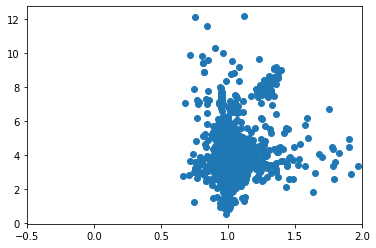

In [3]:
s6 = pd.read_csv('output_log_xrp/output_s6_tmag_7_8.txt',sep=' ',header=None)
s6.columns = [
        "file",
        "signal",
        "signal/noise",
        "time",
        "asym_score",
        "width1",
        "width2",
        "duration",
        "depth",
        "transit_prob",
    ]
s6 = s6[s6.transit_prob == 'maybeTransit']
plt.scatter(s6.asym_score,abs(s6['signal/noise']))
plt.xlim([-0.5,2])

### Onestep

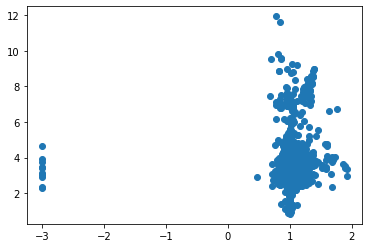

In [4]:
s6_onestep = pd.read_csv('output_log_xrp/output_s6_tmag_7_8_onestep.txt',sep=' ',header=None)
s6_onestep.columns = [
        "file",
        "signal",
        "signal/noise",
        "time",
        "asym_score",
        "width1",
        "width2",
        "duration",
        "depth",
        "transit_prob",
    ]
s6_onestep = s6_onestep[s6_onestep.transit_prob == 'maybeTransit']
plt.scatter(s6_onestep.asym_score,abs(s6_onestep['signal/noise']))

## Calculations

In [12]:
s6_merge = pd.merge(s6,s6_onestep,on='file',suffixes=('_twostep','_onestep'))
s6_merge['delta_s'] = (abs(s6_merge['signal/noise_twostep'])) - (abs(s6_merge['signal/noise_onestep']))
s6_merge['delta_asym'] = (abs(s6_merge.asym_score_twostep)) - (abs(s6_merge.asym_score_onestep))

print(s6_merge['delta_s'].unique())
print(s6_merge['delta_asym'].unique())

[-0.43718465  0.          0.14868782 ...  1.94821959  1.02378208
  0.31139969]
[ 0.00022093  0.         -0.00141102 ...  0.01053217  0.00045222
 -0.018868  ]


In [13]:
s6_merge

,file,signal_twostep,signal/noise_twostep,time_twostep,asym_score_twostep,width1_twostep,width2_twostep,duration_twostep,depth_twostep,transit_prob_twostep,...,signal/noise_onestep,time_onestep,asym_score_onestep,width1_onestep,width2_onestep,duration_onestep,depth_onestep,transit_prob_onestep,delta_s,delta_asym
0,tesslc_427378979.pkl,-14.739694,-7.046571,1485.786776,0.681127,0.047786,0.021027,0.104164,-0.033239,maybeTransit,...,-7.483756,1485.786776,0.680907,0.047803,0.020910,0.104164,-0.033239,maybeTransit,-0.437185,0.000221
1,tesslc_151174377.pkl,-24.809469,-8.996452,1473.433287,1.390706,0.000427,0.072455,0.124999,-0.008167,maybeTransit,...,-8.996452,1473.433287,1.390706,0.000427,0.072455,0.124999,-0.008167,maybeTransit,0.000000,0.000000
2,tesslc_66650093.pkl,-6.387347,-3.784019,1482.786621,1.152241,0.005244,0.098078,0.145831,-0.000525,maybeTransit,...,-3.784019,1482.786621,1.152241,0.005244,0.098078,0.145831,-0.000525,maybeTransit,0.000000,0.000000
3,tesslc_140511145.pkl,-4.822908,-3.328611,1484.426476,1.144910,0.042969,0.285187,0.270831,-0.000257,maybeTransit,...,-3.328611,1484.426476,1.144910,0.042969,0.285187,0.270831,-0.000257,maybeTransit,0.000000,0.000000
4,tesslc_24528242.pkl,-7.490177,-3.284776,1480.638994,1.028404,0.167610,0.037941,0.416660,-0.000505,maybeTransit,...,-3.284776,1480.638994,1.028404,0.167610,0.037941,0.416660,-0.000505,maybeTransit,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,tesslc_167812223.pkl,-11.760042,-4.624163,1485.344787,0.991260,0.180305,0.170927,0.770842,-0.000785,maybeTransit,...,-3.014094,1485.428122,0.964426,0.314708,0.008355,0.583340,-0.000819,maybeTransit,1.610068,0.026834
2248,tesslc_270713898.pkl,-13.489408,-4.996242,1485.141559,1.007992,0.250113,0.559024,0.791678,-0.001354,maybeTransit,...,-3.048022,1485.162393,0.997459,1.072614,0.150639,0.750011,-0.001386,maybeTransit,1.948220,0.010532
2249,tesslc_63359145.pkl,-18.357105,-10.007017,1476.868583,0.961311,0.024511,0.010960,0.062501,-0.002661,maybeTransit,...,-8.983235,1476.868583,0.960858,0.024492,0.010054,0.062501,-0.002661,maybeTransit,1.023782,0.000452
2250,tesslc_97164089.pkl,-9.350616,-4.543564,1485.889063,0.976589,0.107305,0.099316,0.312505,-0.000705,maybeTransit,...,-4.232164,1485.909897,0.995457,0.125825,0.121625,0.375006,-0.000647,maybeTransit,0.311400,-0.018868


In [20]:
s6_merge[s6_merge.delta_s < 0]

,file,signal_twostep,signal/noise_twostep,time_twostep,asym_score_twostep,width1_twostep,width2_twostep,duration_twostep,depth_twostep,transit_prob_twostep,...,signal/noise_onestep,time_onestep,asym_score_onestep,width1_onestep,width2_onestep,duration_onestep,depth_onestep,transit_prob_onestep,delta_s,delta_asym
0,tesslc_427378979.pkl,-14.739694,-7.046571,1485.786776,0.681127,0.047786,0.021027,0.104164,-0.033239,maybeTransit,...,-7.483756,1485.786776,0.680907,0.047803,0.020910,0.104164,-0.033239,maybeTransit,-0.437185,0.000221
32,tesslc_93333338.pkl,-7.744744,-2.954043,1488.327478,1.033915,0.122480,0.157449,0.229163,-0.000667,maybeTransit,...,-4.651099,1488.327478,1.031706,0.152056,0.187754,0.312496,-0.000511,maybeTransit,-1.697056,0.002209
39,tesslc_161614851.pkl,-6.750661,-1.751917,1483.887581,0.971805,0.154125,0.044598,0.312493,-0.000923,maybeTransit,...,-3.338128,1480.200161,0.995863,0.135283,0.226816,0.520823,0.001619,maybeTransit,-1.586211,-0.024058
61,tesslc_219362223.pkl,-18.376438,-4.939941,1482.095520,1.038618,0.180177,0.314449,0.666654,-0.001436,maybeTransit,...,-5.431312,1481.949689,0.985136,0.173392,0.278983,0.437492,-0.001484,maybeTransit,-0.491371,0.053481
114,tesslc_141977647.pkl,-7.049849,-2.559799,1476.489104,1.015642,0.133158,0.217671,0.833337,0.000104,maybeTransit,...,-2.727345,1480.322451,1.003216,0.157700,0.035197,0.354168,-0.000117,maybeTransit,-0.167545,0.012427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,tesslc_142143314.pkl,-6.992631,-1.653583,1488.718814,0.981496,0.106722,0.107007,0.333335,-0.000478,maybeTransit,...,-2.462358,1485.593793,0.979197,0.310088,0.051330,0.666671,0.001111,maybeTransit,-0.808775,0.002299
2203,tesslc_346570538.pkl,-8.370048,-3.839746,1476.786329,1.453256,0.173581,0.003117,0.270834,-0.000529,maybeTransit,...,-3.979600,1476.744662,1.249422,0.182059,0.000014,0.354168,-0.000297,maybeTransit,-0.139854,0.203833
2232,tesslc_55384211.pkl,-11.212210,-3.512256,1481.740236,1.027766,0.102468,0.192411,0.729159,-0.000786,maybeTransit,...,-4.145360,1481.511072,0.948323,0.089594,0.095234,0.312497,-0.000727,maybeTransit,-0.633105,0.079443
2239,tesslc_270711126.pkl,-6.855159,-2.163856,1472.470920,1.096156,0.124129,0.692840,0.583330,0.001141,maybeTransit,...,-2.188732,1476.408409,1.075629,0.084822,0.349791,0.770829,0.000074,maybeTransit,-0.024876,0.020527


---

## Delta S and Delta Asym plots

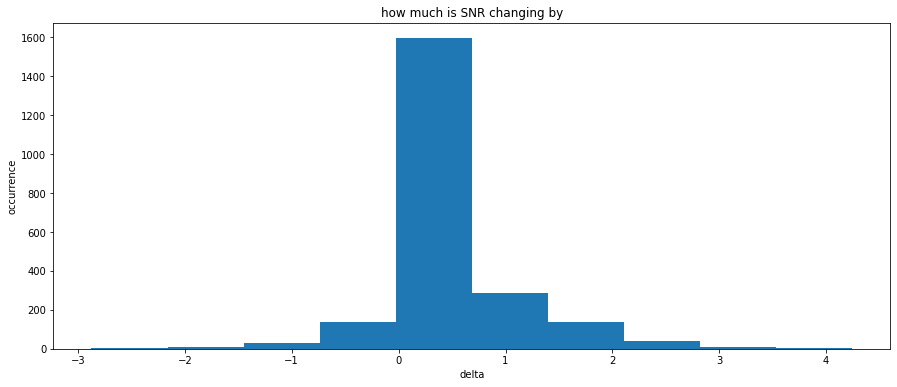

In [17]:
plt.figure(figsize=(15,6))
plt.hist(s6_merge.delta_s)
plt.ylabel('occurrence')
plt.xlabel('delta')
plt.title('how much is SNR changing by')
plt.show()

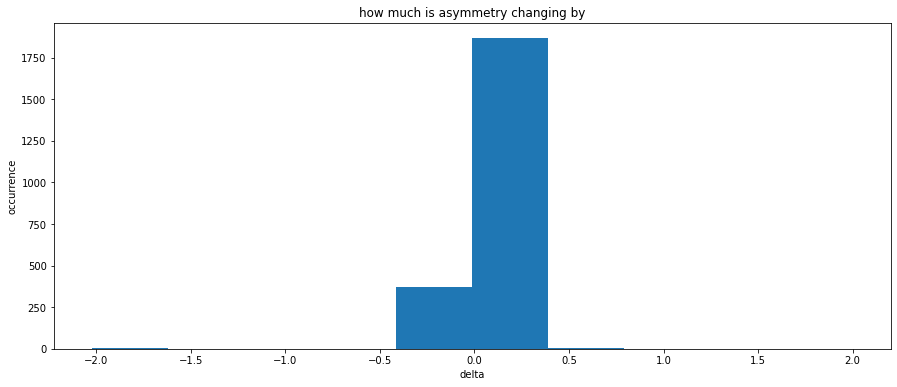

In [15]:
plt.figure(figsize=(15,6))
plt.hist(s6_merge.delta_asym)
plt.ylabel('occurrence')
plt.xlabel('delta')
plt.title('how much is asymmetry changing by')
plt.show()

---

## Distribution of lightcurves in magnitude directory

(0.0, 1.5)

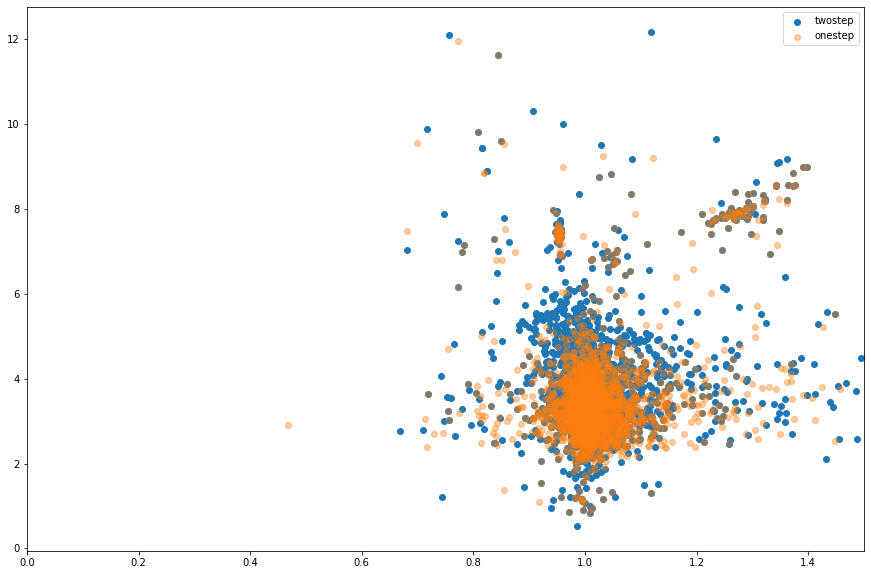

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(s6.asym_score,abs(s6['signal/noise']),label='twostep')
plt.scatter(s6_onestep.asym_score,abs(s6_onestep['signal/noise']),alpha=0.4,label='onestep')
plt.legend()
plt.xlim([0,1.5])

---